Import libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
import matplotlib.pyplot as plt
import os
from nst_torch import style_transfer, utils

In [2]:
# Run this once only
%cd ../

d:\dev\project\Neural-Style-Transfer


Get input images

<built-in method size of Tensor object at 0x000001878DB40F50> <built-in method size of Tensor object at 0x000001878DB40FB0>


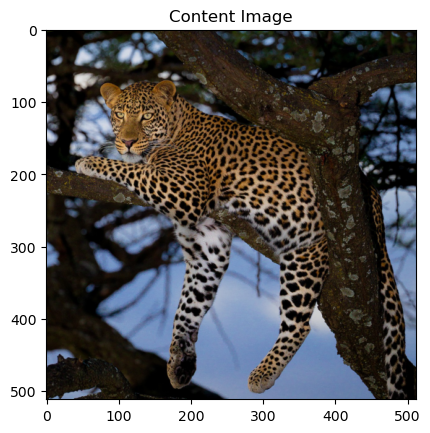

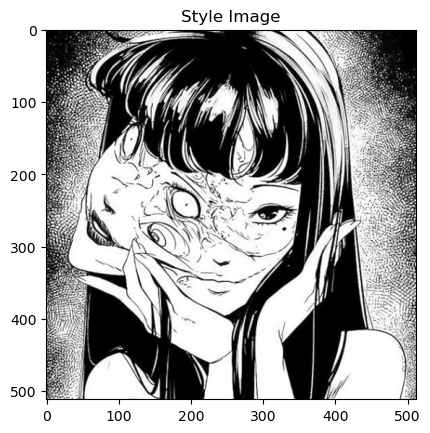

In [3]:
content_path = os.path.join(os.getcwd(), 'content_images')
style_path = os.path.join(os.getcwd(), 'style_images')
output_path = os.path.join(os.getcwd(), 'output_images')

content_img_name = "leopard.jpg"
style_img_name = "junji_ito.jpg"
ctin = content_img_name.split('.')[0]
stin = style_img_name.split('.')[0]

content_img_path = os.path.join(content_path, content_img_name)
style_img_path = os.path.join(style_path, style_img_name)

# Resize the images
imsize = 512

content_img = utils.image_loader(content_img_path, imsize)
style_img = utils.image_loader(style_img_path, imsize)

print(style_img.size, content_img.size)
# assert style_img.size() == content_img.size(), \
#     "Style and content images must be the same size"

plt.figure()
utils.imshow(content_img, title='Content Image')

plt.figure()
utils.imshow(style_img, title='Style Image')


Define model and run

In [8]:
model = style_transfer.StyleTransfer()

output = model.stylize(content_img_path=content_img_path, style_img_path=style_img_path, imsize = imsize, num_steps=1000, learning_rate = 0.1, beta = 1e7, tv_weight=0, initialization='content', return_tensor=True, preserve_color=False)

torch.Size([1, 3, 512, 512]) torch.Size([1, 3, 512, 512])
Optimizing...
Step 50: Style Loss: 0.000902 Content Loss: 13.451034
Step 100: Style Loss: 0.000453 Content Loss: 22.857471
Step 150: Style Loss: 0.000333 Content Loss: 24.744408
Step 200: Style Loss: 0.000263 Content Loss: 25.735844
Step 250: Style Loss: 0.000213 Content Loss: 26.153767
Step 300: Style Loss: 0.000172 Content Loss: 26.635437
Step 350: Style Loss: 0.000138 Content Loss: 27.167393
Step 400: Style Loss: 0.000109 Content Loss: 27.698223
Step 450: Style Loss: 0.000086 Content Loss: 28.296066
Step 500: Style Loss: 0.000068 Content Loss: 28.815456
Step 550: Style Loss: 0.000054 Content Loss: 29.238743
Step 600: Style Loss: 0.000044 Content Loss: 29.562262
Step 650: Style Loss: 0.000037 Content Loss: 29.876289
Step 700: Style Loss: 0.000031 Content Loss: 30.118801
Step 750: Style Loss: 0.000027 Content Loss: 30.297564
Step 800: Style Loss: 0.000023 Content Loss: 30.425552
Step 850: Style Loss: 0.000021 Content Loss: 30.5

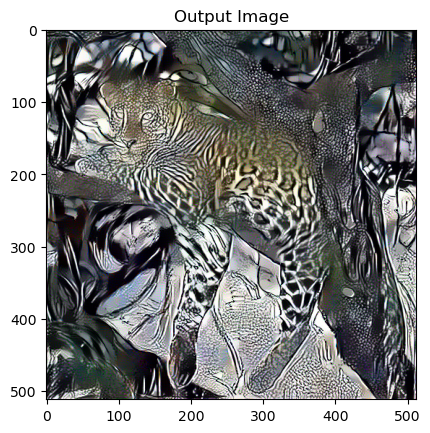

In [9]:
plt.figure()
utils.imshow(output, title='Output Image')
plt.ioff()
plt.show()

Save output as jpg

In [10]:
output_img = utils.image_unloader(output)
output_img.save(os.path.join(output_path, f'{ctin}_styled_as_{stin}.jpg'))

Save output with color preservation

In [11]:
original_color_output = utils.preserve_color_lab(content_img, output)
original_color_output = utils.image_unloader(original_color_output)
original_color_output.save(os.path.join(output_path, f'{ctin}_styled_as_{stin}_preserve_color.jpg'))
# plt.figure()
# utils.imshow(original_color_output, title='Output Image')
# plt.ioff()
# plt.show()